In [76]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('credito8.csv', header=None)

# Set the correct column names
column_names = [
    'age', 'sex', 'dependants', 'scholarity', 'marital_status', 'annual_wage', 
    'card_type', 'products_amount', 'transactions_12m', 'months_inactive_12m', 
    'credit_limit', 'transactions_value_12m', 'transactions_amount_12m'
]
df.columns = column_names

# Display the dataframe
df

,age,sex,dependants,scholarity,marital_status,annual_wage,card_type,products_amount,transactions_12m,months_inactive_12m,credit_limit,transactions_value_12m,transactions_amount_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,34,M,1,na,casado,$60K - $80K,blue,3,3,2,3890.30,1889.41,51
2560,55,M,3,mestrado,solteiro,$80K - $120K,blue,6,3,2,17198.56,4042.73,62
2561,53,M,4,ensino medio,casado,$120K +,blue,6,4,3,3401.79,1924.55,54
2562,37,M,1,na,casado,$60K - $80K,blue,6,2,1,18951.70,2874.56,58


In [78]:
df['annual_wage'].unique()

array(['$60K - $80K', 'menos que $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'na'], dtype=object)

In [79]:
# Dictionary for translations
scholarity_translation = {
    'ensino medio': 'high school',
    'mestrado': "master's degree",
    'sem educacao formal': 'no formal education',
    'na': 'not applicable',
    'graduacao': 'graduation',
    'doutorado': 'doctorate'
}

marital_status_translation = {
    'casado': 'married',
    'solteiro': 'single',
    'na': 'not applicable',
    'divorciado': 'divorced'
}

annual_wage_translation = {
    'menos que $40K': 'less than $40K',
    '$60K - $80K': '$60K - $80K',
    '$80K - $120K': '$80K - $120K',
    '$40K - $60K': '$40K - $60K',
    '120K +': '120K +',
    'na': 'not applicable'
}

# Apply translations
df['scholarity'] = df['scholarity'].map(scholarity_translation)
df['marital_status'] = df['marital_status'].map(marital_status_translation)
df['annual_wage'] = df['annual_wage'].map(annual_wage_translation)

In [80]:
df

,age,sex,dependants,scholarity,marital_status,annual_wage,card_type,products_amount,transactions_12m,months_inactive_12m,credit_limit,transactions_value_12m,transactions_amount_12m
0,45,M,3,high school,married,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,master's degree,single,less than $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,master's degree,married,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,high school,not applicable,less than $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,no formal education,married,$60K - $80K,blue,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,34,M,1,not applicable,married,$60K - $80K,blue,3,3,2,3890.30,1889.41,51
2560,55,M,3,master's degree,single,$80K - $120K,blue,6,3,2,17198.56,4042.73,62
2561,53,M,4,high school,married,NaN,blue,6,4,3,3401.79,1924.55,54
2562,37,M,1,not applicable,married,$60K - $80K,blue,6,2,1,18951.70,2874.56,58


In [81]:
df['annual_wage'].unique()

array(['$60K - $80K', 'less than $40K', '$80K - $120K', '$40K - $60K',
       nan, 'not applicable'], dtype=object)

In [82]:
df.to_csv('credit8_clean.csv', index=False, header=False)

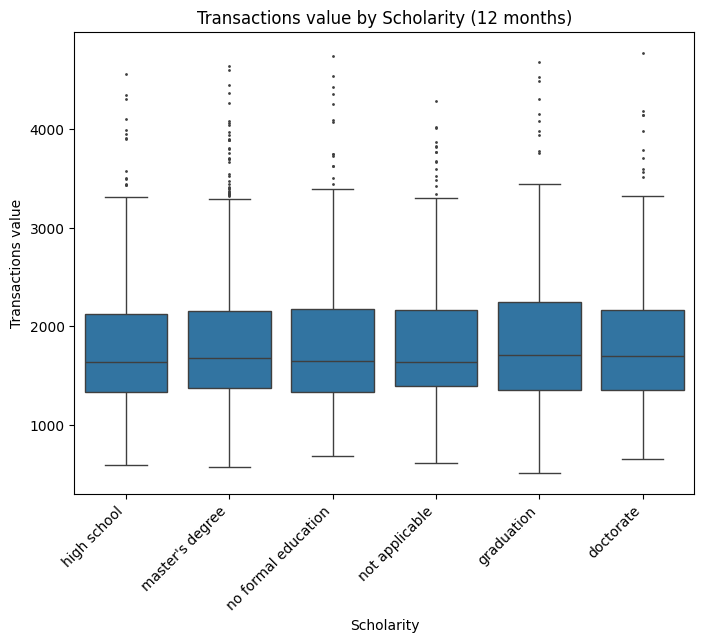

In [83]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='scholarity', y='transactions_value_12m', data=df, fliersize=1)

# Add title and labels
plt.title('Transactions value by Scholarity (12 months)')
plt.xlabel('Scholarity')
plt.ylabel('Transactions value')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [119]:
df['available_credit'] = df['credit_limit'] - df['transactions_value_12m']
df['available_credit']

0       11546.61
1        6965.51
2        1530.84
3        2141.47
4        3900.14
          ...   
2559     2000.89
2560    13155.83
2561     1477.24
2562    16077.14
2563    -1606.13
Name: available_credit, Length: 2564, dtype: float64

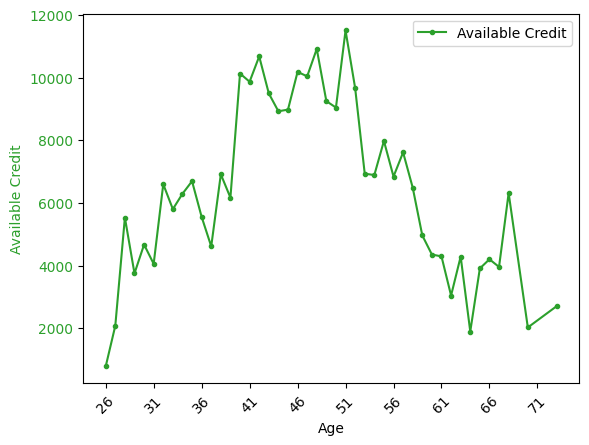

In [123]:
# Calculate averages
age_group = df.groupby('age').agg({
    'available_credit': 'mean',
}).reset_index()

# Plotting
fig, ax1 = plt.subplots()

# Line plot for transactions_value_12m
color = 'tab:green'
ax1.set_xlabel('Age')
ax1.set_ylabel('Available Credit', color=color)
ax1.plot(age_group['age'], age_group['available_credit'], color=color, marker='o', markersize=3, label='Available Credit')
ax1.tick_params(axis='y', labelcolor=color)

# Set x-ticks to show every 5 years
min_age = age_group['age'].min()
max_age = age_group['age'].max()
xticks = range(min_age, max_age + 1, 5)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, rotation=45)  # Rotate labels if needed

# Add a legend
ax1.legend(loc='upper right')

# Show plot
plt.show()

In [85]:
print(df.dtypes)

age                          int64
sex                         object
dependants                   int64
scholarity                  object
marital_status              object
annual_wage                 object
card_type                   object
products_amount              int64
transactions_12m             int64
months_inactive_12m          int64
credit_limit               float64
transactions_value_12m     float64
transactions_amount_12m      int64
dtype: object
